In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
from typing import List, Dict, Any

In [2]:
import io
import json
def _process_data_(file):
    with open(file, 'r') as file:
        log_content = file.read()
    sections = log_content.split('Sandbox logs:')[1].split('Activities log:')
    sandbox_log =  sections[0].strip()
    activities_log = sections[1].split('Trade History:')[0]
    # sandbox_log_list = [json.loads(line) for line in sandbox_log.split('\n')]
    trade_history =  json.loads(sections[1].split('Trade History:')[1])
    # sandbox_log_df = pd.DataFrame(sandbox_log_list)
    market_data_df = pd.read_csv(io.StringIO(activities_log), sep=";", header=0)
    trade_history_df = pd.json_normalize(trade_history)
    return market_data_df, trade_history_df

In [3]:
import ast
def _process_data_(file):
    with open(file, 'r') as file:
        log_content = file.read()
    sections = log_content.split('Sandbox logs:')[1].split('Activities log:')
    sandbox_log = sections[0].strip()
    activities_log = sections[1].split('Trade History:')[0]
    # sandbox_log_list = [json.loads(line) for line in sandbox_log.split('\n')]
    trade_history = ast.literal_eval(sections[1].split('Trade History:')[1])
    
    # sandbox_log_df = pd.DataFrame(sandbox_log_list)
    market_data_df = pd.read_csv(io.StringIO(activities_log), sep=";", header=0)
    trade_history_df = pd.json_normalize(trade_history)
    return market_data_df, trade_history_df

In [4]:
filippo_data,filippo_trad_history = _process_data_(r"/Users/andaks/Downloads/731d4b9e-9628-40a7-a882-9f7112493a94_final.log")

In [8]:
filippo_data

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,3,0,SQUID_INK,1820.0,1.0,1819.0,27.0,NaN,NaN,1822,27,NaN,NaN,NaN,NaN,1821.0,0.0000
1,3,0,VOLCANIC_ROCK_VOUCHER_10000,182.0,16.0,NaN,NaN,NaN,NaN,183,16,NaN,NaN,NaN,NaN,182.5,0.0000
2,3,0,KELP,2040.0,28.0,NaN,NaN,NaN,NaN,2043,27,NaN,NaN,NaN,NaN,2041.5,0.0000
3,3,0,RAINFOREST_RESIN,9992.0,33.0,NaN,NaN,NaN,NaN,10008,33,NaN,NaN,NaN,NaN,10000.0,0.0000
4,3,0,VOLCANIC_ROCK_VOUCHER_10250,36.0,16.0,NaN,NaN,NaN,NaN,37,16,NaN,NaN,NaN,NaN,36.5,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139995,3,999900,JAMS,6446.0,96.0,6445.0,175.0,NaN,NaN,6447,261,NaN,NaN,NaN,NaN,6446.5,0.0000
139996,3,999900,CROISSANTS,4295.0,148.0,NaN,NaN,NaN,NaN,4296,62,4297.0,86.0,NaN,NaN,4295.5,0.0000
139997,3,999900,VOLCANIC_ROCK_VOUCHER_9500,421.0,20.0,NaN,NaN,NaN,NaN,422,20,NaN,NaN,NaN,NaN,421.5,35710.5625
139998,3,999900,VOLCANIC_ROCK,9920.0,137.0,9919.0,69.0,NaN,NaN,9921,131,9922.0,69.0,NaN,NaN,9920.5,0.0000


/var/folders/gh/dfjmmnfn63s_k8hfzrv1t9m40000gn/T/ipykernel_44451/961306293.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20', len(unique_products))  # Use a colormap with enough distinct colors


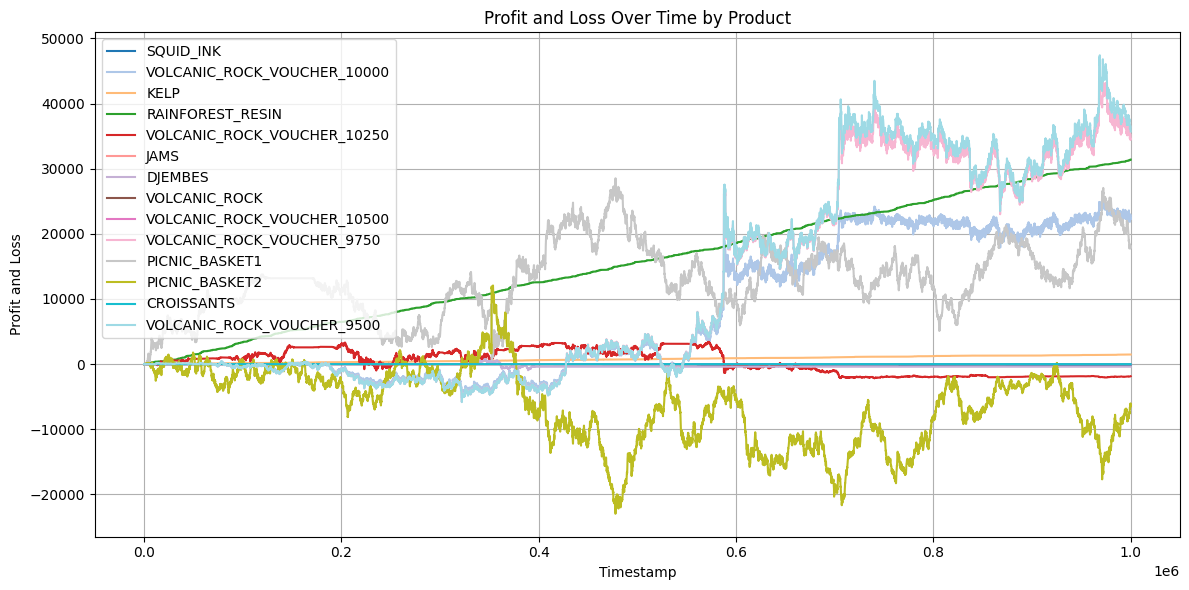

In [16]:
import numpy as np

import matplotlib.cm as cm

plt.figure(figsize=(12, 6))  # Set the figure size
unique_products = filippo_data['product'].unique()
colors = cm.get_cmap('tab20', len(unique_products))  # Use a colormap with enough distinct colors

for i, product in enumerate(unique_products):
    product_data = filippo_data[filippo_data['product'] == product]
    plt.plot(product_data['timestamp'], product_data['profit_and_loss'], label=product, color=colors(i))

plt.title('Profit and Loss Over Time by Product')  # Add a title
plt.xlabel('Timestamp')  # Label for the x-axis
plt.ylabel('Profit and Loss')  # Label for the y-axis
plt.legend(loc='best')  # Add a legend
plt.grid(True)  # Add gridlines
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()  # Display the plot

In [8]:
filippo_trad_history

,timestamp,buyer,seller,symbol,currency,price,quantity
0,0,,SUBMISSION,RAINFOREST_RESIN,SEASHELLS,10004,1
1,0,,,KELP,SEASHELLS,2029,13
2,0,,,KELP,SEASHELLS,2029,1
3,1100,SUBMISSION,,RAINFOREST_RESIN,SEASHELLS,9996,2
4,1700,,SUBMISSION,KELP,SEASHELLS,2026,8
...,...,...,...,...,...,...,...
1101,199400,,,RAINFOREST_RESIN,SEASHELLS,10004,1
1102,199500,,,RAINFOREST_RESIN,SEASHELLS,10002,1
1103,199600,,,KELP,SEASHELLS,2023,1
1104,199600,,,KELP,SEASHELLS,2023,1


In [3]:

data = pd.read_csv("b7e325da-1555-4de3-b99f-0f3017c74a62.csv",sep = ";")
imc_market_data, imc_trade_history = _process_data_("0ba10e6d-0b66-42be-9334-ab9d5aeea092.log")

In [4]:
imc_market_data

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-1,0,RAINFOREST_RESIN,10002,1,9996.0,2.0,9995.0,29.0,10004,2,10005.0,29.0,NaN,NaN,10003.0,0.000000
1,-1,0,KELP,2028,1,2026.0,2.0,2025.0,29.0,2029,31,NaN,NaN,NaN,NaN,2028.5,0.000000
2,-1,100,KELP,2025,24,NaN,NaN,NaN,NaN,2028,2,2029.0,22.0,NaN,NaN,2026.5,0.000000
3,-1,100,RAINFOREST_RESIN,9996,2,9995.0,22.0,NaN,NaN,10004,2,10005.0,22.0,NaN,NaN,10000.0,0.000000
4,-1,200,RAINFOREST_RESIN,9995,20,NaN,NaN,NaN,NaN,10005,20,NaN,NaN,NaN,NaN,10000.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,-1,199700,KELP,2020,27,NaN,NaN,NaN,NaN,2023,2,2024.0,25.0,NaN,NaN,2021.5,44.632812
3996,-1,199800,RAINFOREST_RESIN,9995,21,NaN,NaN,NaN,NaN,10002,8,10005.0,21.0,NaN,NaN,9998.5,1026.000000
3997,-1,199800,KELP,2020,21,NaN,NaN,NaN,NaN,2023,21,NaN,NaN,NaN,NaN,2021.5,45.542969
3998,-1,199900,KELP,2020,32,NaN,NaN,NaN,NaN,2022,7,2023.0,2.0,2024.0,30.0,2021.0,43.671875


In [5]:
class Backtester:
    def __init__(self, trader, listings: Dict[str, Listing], position_limit: Dict[str, int], fair_marks, 
                 market_data: pd.DataFrame, trade_history: pd.DataFrame, file_name: str = None):
        self.trader = trader
        self.listings = listings
        self.market_data = market_data
        self.position_limit = position_limit
        self.fair_marks = fair_marks
        self.trade_history = trade_history.sort_values(by=['timestamp', 'symbol'])
        self.file_name = file_name

        self.observations = [Observation({}, {}) for _ in range(len(market_data))]

        self.current_position = {product: 0 for product in self.listings.keys()}
        self.pnl_history = []
        self.pnl = {product: 0 for product in self.listings.keys()}
        self.cash = {product: 0 for product in self.listings.keys()}
        self.trades = []
        self.sandbox_logs = []
        
    def run(self):
        traderData = ""
        
        timestamp_group_md = self.market_data.groupby('timestamp')
        timestamp_group_th = self.trade_history.groupby('timestamp')
        
        own_trades = defaultdict(list)
        market_trades = defaultdict(list)
        pnl_product = defaultdict(float)
        
        trade_history_dict = {}
        
        for timestamp, group in timestamp_group_th:
            trades = []
            for _, row in group.iterrows():
                symbol = row['symbol']
                price = row['price']
                quantity = row['quantity']
                buyer = row['buyer'] if pd.notnull(row['buyer']) else ""
                seller = row['seller'] if pd.notnull(row['seller']) else ""

                
                trade = Trade(symbol, int(price), int(quantity), buyer, seller, timestamp)
                
                trades.append(trade)
            trade_history_dict[timestamp] = trades
        
        
        for timestamp, group in timestamp_group_md:
            order_depths = self._construct_order_depths(group)
            order_depths_matching = self._construct_order_depths(group)
            order_depths_pnl = self._construct_order_depths(group)
            state = self._construct_trading_state(traderData, timestamp, self.listings, order_depths, 
                                 dict(own_trades), dict(market_trades), self.current_position, self.observations)
            orders, conversions, traderData = self.trader.run(state)
            products = group['product'].tolist()
            sandboxLog = ""
            trades_at_timestamp = trade_history_dict.get(timestamp, [])

            for product in products:
                new_trades = []
                for order in orders.get(product, []):
                    trades_done, sandboxLog = self._execute_order(timestamp, order, order_depths_matching, self.current_position, self.cash, trade_history_dict, sandboxLog)
                    new_trades.extend(trades_done)
                if len(new_trades) > 0:
                    own_trades[product] = new_trades
            self.sandbox_logs.append({"sandboxLog": sandboxLog, "lambdaLog": "", "timestamp": timestamp})

            trades_at_timestamp = trade_history_dict.get(timestamp, [])
            if trades_at_timestamp:
                for trade in trades_at_timestamp:
                    product = trade.symbol
                    market_trades[product].append(trade)
            else: 
                for product in products:
                    market_trades[product] = []

            
            for product in products:
                self._mark_pnl(self.cash, self.current_position, order_depths_pnl, self.pnl, product)
                self.pnl_history.append(self.pnl[product])
            self._add_trades(own_trades, market_trades)
        return self._log_trades(self.file_name)
    
    
    def _log_trades(self, filename: str = None):
        if filename is None:
            return 

        self.market_data['profit_and_loss'] = self.pnl_history

        output = ""
        output += "Sandbox logs:\n"
        for i in self.sandbox_logs:
            output += json.dumps(i, indent=2) + "\n"

        output += "\n\n\n\nActivities log:\n"
        market_data_csv = self.market_data.to_csv(index=False, sep=";")
        market_data_csv = market_data_csv.replace("\r\n", "\n")
        output += market_data_csv

        output += "\n\n\n\nTrade History:\n"
        output += json.dumps(self.trades, indent=2)

        with open(filename, 'w') as file:
            file.write(output)

            
    def _add_trades(self, own_trades: Dict[str, List[Trade]], market_trades: Dict[str, List[Trade]]):
        products = set(own_trades.keys()) | set(market_trades.keys())
        for product in products:
            self.trades.extend([self._trade_to_dict(trade) for trade in own_trades.get(product, [])])
        for product in products:
            self.trades.extend([self._trade_to_dict(trade) for trade in market_trades.get(product, [])])

    def _trade_to_dict(self, trade: Trade) -> dict[str, Any]:
        return {
            "timestamp": trade.timestamp,
            "buyer": trade.buyer,
            "seller": trade.seller,
            "symbol": trade.symbol,
            "currency": "SEASHELLS",
            "price": trade.price,
            "quantity": trade.quantity,
        }
        
    def _construct_trading_state(self, traderData, timestamp, listings, order_depths, 
                                 own_trades, market_trades, position, observations):
        state = TradingState(traderData, timestamp, listings, order_depths, 
                             own_trades, market_trades, position, observations)
        return state
 
        
    def _construct_order_depths(self, group):
        order_depths = {}
        for idx, row in group.iterrows():
            product = row['product']
            order_depth = OrderDepth()
            for i in range(1, 4):
                if f'bid_price_{i}' in row and f'bid_volume_{i}' in row:
                    bid_price = row[f'bid_price_{i}']
                    bid_volume = row[f'bid_volume_{i}']
                    if not pd.isna(bid_price) and not pd.isna(bid_volume):
                        order_depth.buy_orders[int(bid_price)] = int(bid_volume)
                if f'ask_price_{i}' in row and f'ask_volume_{i}' in row:
                    ask_price = row[f'ask_price_{i}']
                    ask_volume = row[f'ask_volume_{i}']
                    if not pd.isna(ask_price) and not pd.isna(ask_volume):
                        order_depth.sell_orders[int(ask_price)] = -int(ask_volume)
            order_depths[product] = order_depth
        return order_depths
    
        
        
    def _execute_buy_order(self, timestamp, order, order_depths, position, cash, trade_history_dict, sandboxLog):
        trades = []
        order_depth = order_depths[order.symbol]

        for price, volume in list(order_depth.sell_orders.items()):
            if price > order.price or order.quantity == 0:
                break

            trade_volume = min(abs(order.quantity), abs(volume))
            # Calculate the new position after the trade would be executed
            new_position = position[order.symbol] + trade_volume
            
            # Check if the new position is within limits
            if abs(new_position) <= int(self.position_limit[order.symbol]):
                trades.append(Trade(order.symbol, price, trade_volume, "SUBMISSION", "", timestamp))
                position[order.symbol] = new_position
                cash[order.symbol] -= price * trade_volume
                order_depth.sell_orders[price] += trade_volume
                order.quantity -= trade_volume
            else:
                sandboxLog += f"\nOrders for product {order.symbol} exceeded limit of {self.position_limit[order.symbol]} set"
            
            if order_depth.sell_orders[price] == 0:
                del order_depth.sell_orders[price]
        
        trades_at_timestamp = trade_history_dict.get(timestamp, [])
        new_trades_at_timestamp = []
        for trade in trades_at_timestamp:
            if trade.symbol == order.symbol:
                if trade.price < order.price:
                    trade_volume = min(abs(order.quantity), abs(trade.quantity))
                    
                    # Calculate the new position after this trade would be executed
                    new_position = position[order.symbol] + trade_volume
                    
                    # Check if the new position is within limits
                    if abs(new_position) <= int(self.position_limit[order.symbol]):
                        trades.append(Trade(order.symbol, order.price, trade_volume, "SUBMISSION", "", timestamp))
                        order.quantity -= trade_volume
                        position[order.symbol] = new_position
                        cash[order.symbol] -= order.price * trade_volume
                        
                        if trade_volume == abs(trade.quantity):
                            continue
                        else:
                            new_quantity = trade.quantity - trade_volume
                            new_trades_at_timestamp.append(Trade(order.symbol, order.price, new_quantity, "", "", timestamp))
                            continue
                    else:
                        sandboxLog += f"\nOrders for product {order.symbol} exceeded limit of {self.position_limit[order.symbol]} set"
            new_trades_at_timestamp.append(trade)  

        if len(new_trades_at_timestamp) > 0:
            trade_history_dict[timestamp] = new_trades_at_timestamp

        return trades, sandboxLog
        
        
        
    def _execute_sell_order(self, timestamp, order, order_depths, position, cash, trade_history_dict, sandboxLog):
        trades = []
        order_depth = order_depths[order.symbol]
        
        for price, volume in sorted(order_depth.buy_orders.items(), reverse=True):
            if price < order.price or order.quantity == 0:
                break

            trade_volume = min(abs(order.quantity), abs(volume))
            
            # Calculate the new position after the trade would be executed
            new_position = position[order.symbol] - trade_volume
            
            # Check if the new position is within limits
            if abs(new_position) <= int(self.position_limit[order.symbol]):
                trades.append(Trade(order.symbol, price, trade_volume, "", "SUBMISSION", timestamp))
                position[order.symbol] = new_position
                cash[order.symbol] += price * trade_volume
                order_depth.buy_orders[price] -= trade_volume
                order.quantity += trade_volume  # Making quantity less negative
            else:
                sandboxLog += f"\nOrders for product {order.symbol} exceeded limit of {self.position_limit[order.symbol]} set"

            if order_depth.buy_orders[price] == 0:
                del order_depth.buy_orders[price]

        trades_at_timestamp = trade_history_dict.get(timestamp, [])
        new_trades_at_timestamp = []
        for trade in trades_at_timestamp:
            if trade.symbol == order.symbol:
                if trade.price > order.price:
                    trade_volume = min(abs(order.quantity), abs(trade.quantity))
                    
                    # Calculate the new position after this trade would be executed
                    new_position = position[order.symbol] - trade_volume
                    
                    # Check if the new position is within limits
                    if abs(new_position) <= int(self.position_limit[order.symbol]):
                        trades.append(Trade(order.symbol, order.price, trade_volume, "", "SUBMISSION", timestamp))
                        order.quantity += trade_volume  # Making quantity less negative
                        position[order.symbol] = new_position
                        cash[order.symbol] += order.price * trade_volume
                        
                        if trade_volume == abs(trade.quantity):
                            continue
                        else:
                            new_quantity = trade.quantity - trade_volume
                            new_trades_at_timestamp.append(Trade(order.symbol, order.price, new_quantity, "", "", timestamp))
                            continue
                    else:
                        sandboxLog += f"\nOrders for product {order.symbol} exceeded limit of {self.position_limit[order.symbol]} set"
            new_trades_at_timestamp.append(trade)  

        if len(new_trades_at_timestamp) > 0:
            trade_history_dict[timestamp] = new_trades_at_timestamp
                
        return trades, sandboxLog
        
        
        
    def _execute_order(self, timestamp, order, order_depths, position, cash, trades_at_timestamp, sandboxLog):
        if order.quantity == 0:
            return [], sandboxLog
        
        order_depth = order_depths[order.symbol]
        if order.quantity > 0:
            return self._execute_buy_order(timestamp, order, order_depths, position, cash, trades_at_timestamp, sandboxLog)
        else:
            return self._execute_sell_order(timestamp, order, order_depths, position, cash, trades_at_timestamp, sandboxLog)

    def _mark_pnl(self, cash, position, order_depths, pnl, product):
        order_depth = order_depths[product]
        
        best_ask = min(order_depth.sell_orders.keys())
        best_bid = max(order_depth.buy_orders.keys())
        mid = (best_ask + best_bid)/2
        fair = mid
        if product in self.fair_marks:
            fair = self.fair_marks[product]
            #fair = get_fair(order_depth)
        
        pnl[product] = cash[product] + fair * position[product]
        
        # If neither exists, PnL remains unchanged

In [6]:
listings: Dict[Symbol, Listing] = {product: Listing(symbol=product,product=product,denomination="SEASHELLS") for product in 
                                   imc_market_data['product'].unique()}  
fair_marks ={"RAINFOREST_RESIN": 10000}
backtester = Backtester(TraderFilippo(),listings,position_limit={"RAINFOREST_RESIN": 50, "KELP": 50},
                       fair_marks=fair_marks,market_data=imc_market_data, trade_history=imc_trade_history, 
                       file_name="backtest_output.log")
backtester.run()

In [7]:
test_market,test_history = _process_data_("backtest_output.log")

In [8]:
rainforest_data = test_market[test_market["product"] == "RAINFOREST_RESIN"]
kelp_data = test_market[test_market["product"] == "KELP"]

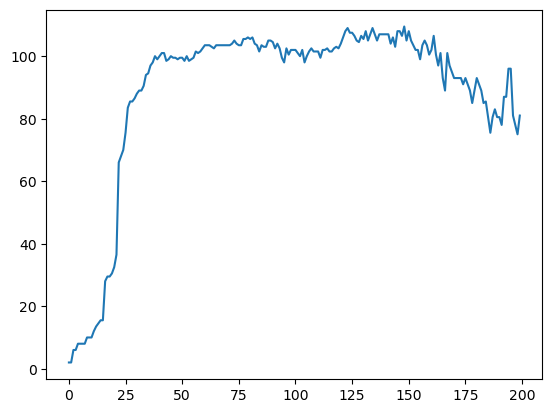

In [9]:
#plt.plot(kelp_data["profit_and_loss"][::10])
import numpy as np
#plt.plot(rainforest_data["profit_and_loss"][::10])
from scipy.signal import savgol_filter

combined_pnl = np.array(kelp_data["profit_and_loss"][::10]) + np.array(rainforest_data["profit_and_loss"][::10])

plt.plot(combined_pnl)

In [10]:
sum(backtester.pnl.values())

84.0

In [208]:
for i in range(1,4):
    print(f"bid_price_{i} for kelp",kelp_imc[f"bid_price_{i}"].mean())
    print(f"ask_price_{i} for kelp",kelp_imc[f"ask_price_{i}"].mean())
    print(f"bid_price_{i} for rainforest",rainforest_imc[f"bid_price_{i}"].mean())
    print(f"ask_price_{i} for rainforest",rainforest_imc[f"ask_price_{i}"].mean())






bid_price_1 for kelp 2017.6785
ask_price_1 for kelp 2020.4255
bid_price_1 for rainforest 9996.627
ask_price_1 for rainforest 10003.4805
bid_price_2 for kelp 2017.455497382199
ask_price_2 for kelp 2020.8654244306417
bid_price_2 for rainforest 9995.301229508197
ask_price_2 for rainforest 10004.744329896906
bid_price_3 for kelp 2016.7272727272727
ask_price_3 for kelp 2021.2173913043478
bid_price_3 for rainforest 9995.094017094018
ask_price_3 for rainforest 10004.94701986755
